# There are 13 actions:
**1	Jumping in place	
2	Jumping jacks	
3	Bending - hands up all the way down	
4	Punching (boxing)	
5	Waving - two hands	
6	Waving - one hand (right)
7	Clapping hands	
8	Throwing a ball
9	Sit down then stand up	
10	Sit down	
11	Stand up	
12	T-pose**

# Data Storage Format

- The files in database are in format of "txt".In txt files there are joint coordinates of 43 markers in human body in order.


# Let's start code!
**First, we import pandas and os library.Then, we iterate over all txt files and collect all joint data with labels in a dataframe.Every row of dataframe is a action in a sample, and there are 129 xyz joint coordinates and 1 class label named 'classs' column.**

In [1]:
import pandas as pd
import os
path = '/kaggle/input/berkeley-multimodal-human-action-database/'

full_data = pd.DataFrame()

for entry in sorted(os.listdir(path)):
    if os.path.isfile(os.path.join(path, entry)):
        if entry.endswith('.txt'):
            data = pd.read_csv(path+entry,sep=' ',header=None)
            data.drop([129,130],inplace=True,axis=1)
            data['classs'] = entry[-10:-8]
            full_data = pd.concat([full_data,data],ignore_index=True)

**Let's check the data size of data.There are 2401920 rows(samples) and 130 features, last feature named 'classs' is label of that row.**

In [2]:
full_data.shape

(2401920, 130)

**When we check data types of the dataframe we can clearly see that first 129 rows are x,y,z features in format of float and the last column named 'classs' is object in string format which is labels.**

In [3]:
full_data.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
125       float64
126       float64
127       float64
128       float64
classs     object
Length: 130, dtype: object

**Let's have a look to data.**

In [4]:
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,classs
0,535.633972,1596.885742,182.630203,638.731995,1557.109741,103.225571,478.292816,1529.775635,36.972523,470.245300,...,387.926392,151.815430,78.476036,400.183411,37.893978,49.051929,384.553955,44.167561,119.841316,01
1,535.525940,1597.152832,183.330444,638.749329,1557.116211,103.531601,478.020782,1530.198242,37.841022,470.252930,...,387.690735,151.693314,78.362648,400.167511,37.912468,49.064564,384.611206,44.061180,119.831841,01
2,535.596985,1597.039429,183.522781,638.780151,1557.109253,103.958931,478.092926,1530.162109,37.929157,470.279816,...,387.755524,151.714722,78.404068,400.146179,37.915264,49.033600,384.590485,44.102978,119.838036,01
3,535.639526,1597.143188,184.039703,638.775635,1557.160278,104.183563,477.950867,1530.371582,38.480976,470.298187,...,387.915710,151.737381,78.505905,400.148834,37.911430,49.032551,384.516388,44.200638,119.834976,01
4,535.655212,1597.121704,184.348969,638.669312,1557.312012,104.405937,477.942841,1530.448730,38.754547,470.311096,...,387.863953,151.710251,78.485397,400.103546,37.932167,49.079586,384.530640,44.183495,119.837440,01


**In this section, I want to have a look to memory usage of dataframe.You know that kaggle provide us 16GB memory and this dataframe is quaite big.I just wanted to see that "can kaggle hardware handle this?"**

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401920 entries, 0 to 2401919
Columns: 130 entries, 0 to classs
dtypes: float64(129), object(1)
memory usage: 2.3+ GB


**In this section, we split data as features and label."x" variable is features and "y" variable is label of that features in order.**

In [6]:
x = full_data.drop(["classs"],axis=1)
y = full_data.classs.values
x.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,535.633972,1596.885742,182.630203,638.731995,1557.109741,103.225571,478.292816,1529.775635,36.972523,470.245300,...,82.758965,387.926392,151.815430,78.476036,400.183411,37.893978,49.051929,384.553955,44.167561,119.841316
1,535.525940,1597.152832,183.330444,638.749329,1557.116211,103.531601,478.020782,1530.198242,37.841022,470.252930,...,82.767532,387.690735,151.693314,78.362648,400.167511,37.912468,49.064564,384.611206,44.061180,119.831841
2,535.596985,1597.039429,183.522781,638.780151,1557.109253,103.958931,478.092926,1530.162109,37.929157,470.279816,...,82.805794,387.755524,151.714722,78.404068,400.146179,37.915264,49.033600,384.590485,44.102978,119.838036
3,535.639526,1597.143188,184.039703,638.775635,1557.160278,104.183563,477.950867,1530.371582,38.480976,470.298187,...,82.827797,387.915710,151.737381,78.505905,400.148834,37.911430,49.032551,384.516388,44.200638,119.834976
4,535.655212,1597.121704,184.348969,638.669312,1557.312012,104.405937,477.942841,1530.448730,38.754547,470.311096,...,82.962585,387.863953,151.710251,78.485397,400.103546,37.932167,49.079586,384.530640,44.183495,119.837440


**("y") Label data is in format of string,for 01-11 classes are basicly can be convertable to integer.But 12th class is like "t-" which is a string.So in this section we replace "t-" with "12" and convert it to integer.**

In [7]:
y = pd.DataFrame(y)
y.iloc[:,0] = y.iloc[:,0].str.replace('t','1')
y.iloc[:,0] = y.iloc[:,0].str.replace('-','2')
y.astype('int32')

,0
0,1
1,1
2,1
3,1
4,1
...,...
2401915,12
2401916,12
2401917,12
2401918,12


**Now, we can split data as train and test data.**

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

print('Shape of train data is : ',x_train.shape)
print('Shape of label data is : ',y_train.shape)

Shape of train data is :  (1801440, 129)
Shape of label data is :  (1801440, 1)


In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_train, x_test, y_train, y_test are DataFrames or NumPy arrays

# Convert NumPy arrays to PyTorch tensors with appropriate data types
x_train_tensor = torch.FloatTensor(x_train.values.astype(np.float32))
x_test_tensor = torch.FloatTensor(x_test.values.astype(np.float32))

# Ensure that the labels are integers starting from 0
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

# Adjust class values to start from 0
y_train_tensor = torch.LongTensor(y_train.values - 1)  # Subtract 1 to start from 0
y_test_tensor = torch.LongTensor(y_test.values - 1)  # Subtract 1 to start from 0

# Print sizes for diagnosis
print('Size of x_train_tensor:', x_train_tensor.size())
print('Size of y_train_tensor:', y_train_tensor.size())

# Create DataLoader for batching (optional, but recommended for large datasets)
batch_size = 64

# Create TensorDataset using PyTorch tensors
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print shapes for verification
print('Shape of train data:', x_train_tensor.shape)
print('Shape of original integer label data:', y_train_tensor.shape)

Size of x_train_tensor: torch.Size([1801440, 129])
Size of y_train_tensor: torch.Size([1801440, 1])
Shape of train data: torch.Size([1801440, 129])
Shape of original integer label data: torch.Size([1801440, 1])


In [12]:
import torch.optim as optim
import torch.nn as nn
import torch

class CorrectedLSTMPyTorch(nn.Module):
    def __init__(self, input_size=129, hidden_size=256, output_size=13, num_layers=2, dropout=0.5):
        super(CorrectedLSTMPyTorch, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 64)
        self.output_layer = nn.Linear(64, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = lstm_out[:, -1, :]  # Take the output from the last time step
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(torch.relu(self.fc2(x)))
        x = self.dropout(torch.relu(self.fc3(x)))
        x = self.dropout(torch.relu(self.fc4(x)))
        x = self.output_layer(x)
        return x

# Assuming you have a sample input with batch_size=1, seq_length=5, and input_size=129
sample_input = torch.randn(64, 5, 129)
# Instantiate the model
corrected_model_pytorch = CorrectedLSTMPyTorch()

# Forward pass
output = corrected_model_pytorch(sample_input)
print(output.shape)

# Define loss function and optimizer
criterion_pytorch = nn.CrossEntropyLoss()
optimizer_pytorch = optim.Adam(corrected_model_pytorch.parameters(), lr=0.001)

# Print the model summary
print(corrected_model_pytorch)


torch.Size([64, 13])
CorrectedLSTMPyTorch(
  (lstm): LSTM(129, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=13, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [15]:
device = torch.device("cpu")
print(f"Using device: {device}")

Using device: cpu


In [21]:
num_epochs = 5
batch_size = 64
seq_length=5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the loss list
loss_list = []

# Assuming you've defined your model and data loaders before this point
corrected_model_pytorch.to(device)

for epoch in range(num_epochs):
    corrected_model_pytorch.train()
    epoch_loss = 0.0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.squeeze().long().to(device)

        # Add a batch dimension and sequence length to the inputs
        inputs = inputs.unsqueeze(1).expand(-1, seq_length, -1)

        # Forward pass
        outputs = corrected_model_pytorch(inputs)
        loss = criterion_pytorch(outputs, labels)

        # Backward and optimize
        optimizer_pytorch.zero_grad()
        loss.backward()
        optimizer_pytorch.step()

        epoch_loss += loss.item()
        
        # Print every N batches (adjust N based on your preference)
        print_interval = 10000
        if batch_idx % print_interval == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item()}')

    # Calculate average epoch loss
    avg_epoch_loss = epoch_loss / len(train_loader)

    print(f'Epoch {epoch + 1}/{num_epochs}, Average Loss: {avg_epoch_loss}')

    # Append the training loss to the list
    loss_list.append(avg_epoch_loss)

    

Using device: cpu
Epoch 1/5, Batch 1/28148, Loss: 1.434524655342102
Epoch 1/5, Batch 10001/28148, Loss: 1.30508553981781
Epoch 1/5, Batch 20001/28148, Loss: 1.5699872970581055
Epoch 1/5, Average Loss: 1.4480053667882737
Epoch 2/5, Batch 1/28148, Loss: 1.5012102127075195
Epoch 2/5, Batch 10001/28148, Loss: 1.406578540802002
Epoch 2/5, Batch 20001/28148, Loss: 1.7768583297729492
Epoch 2/5, Average Loss: 1.4804488645920246
Epoch 3/5, Batch 1/28148, Loss: 1.6491880416870117
Epoch 3/5, Batch 10001/28148, Loss: 1.3437955379486084
Epoch 3/5, Batch 20001/28148, Loss: 1.3444037437438965
Epoch 3/5, Average Loss: 1.4376449681245689
Epoch 4/5, Batch 1/28148, Loss: 1.2618688344955444
Epoch 4/5, Batch 10001/28148, Loss: 1.4996070861816406
Epoch 4/5, Batch 20001/28148, Loss: 1.3184369802474976
Epoch 4/5, Average Loss: 1.4145053109294128
Epoch 5/5, Batch 1/28148, Loss: 1.8055692911148071
Epoch 5/5, Batch 10001/28148, Loss: 1.5097061395645142
Epoch 5/5, Batch 20001/28148, Loss: 1.3706358671188354
Epoch

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

corrected_model_pytorch.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.squeeze().long().to(device)
        inputs = inputs.unsqueeze(1).expand(-1, seq_length, -1)

        # Forward pass
        outputs = corrected_model_pytorch(inputs)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to NumPy arrays for easier computation
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)



# Compute accuracy
accuracy = accuracy_score(all_labels, all_predictions)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')


# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Compute precision, recall, and f1-score
class_report = classification_report(all_labels, all_predictions)
print('Classification Report:')
print(class_report)


Accuracy: 51.17%
Confusion Matrix:
[[   122      0     93    251      0  29782      0      0   5223      0
       0      0]
 [     0      0   1182    130      0  44509      0      0    843      0
       0      0]
 [    18      0  93488   3175      0  13636      0      0    949      0
       0      0]
 [    87      0   7683  29070      1  16703      0      0   6170      0
       0      0]
 [     0      0  11020      0      0  49663      0      0    127      0
       0      0]
 [     0      0     80      0      0  63097      0      0    326      0
       0      0]
 [   301      0    703   3711      0  14691      0      0  11876      0
       0      0]
 [    41      1     14    801      0  16855      0      0   3943      0
       0      0]
 [     0      0    146     38      0   2758      0      0 121501      0
       0      0]
 [     0      0      0      0      0   1942      0      0  19526      0
       0      0]
 [     0      0      0      2      0   1130      0      0  16101      0
   

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.00      0.01     35471
           1       0.00      0.00      0.00     46664
           2       0.82      0.84      0.83    111266
           3       0.78      0.49      0.60     59714
           4       0.00      0.00      0.00     60810
           5       0.24      0.99      0.39     63503
           6       0.00      0.00      0.00     31282
           7       0.00      0.00      0.00     21655
           8       0.65      0.98      0.78    124443
           9       0.00      0.00      0.00     21468
          10       0.00      0.00      0.00     17233
          11       0.00      0.00      0.00      6971

    accuracy                           0.51    600480
   macro avg       0.23      0.28      0.22    600480
weighted avg       0.40      0.51      0.42    600480



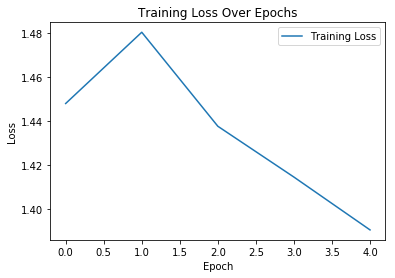

In [23]:
import matplotlib.pyplot as plt

# Assuming you have the loss_list variable from your training loop
# loss_list = [...]

# Plot the loss curve
plt.plot(loss_list, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
